1)

Sei $x$ Eigenvektor mit Eigenwert $\beta$ 

$$ (x^*\beta\ x)^* = (x^*Ax)^* = (x^* A ^* x) = (x^*Ax) = (x^* \beta x) \Rightarrow\ \beta\ ^* = \beta\  $$ 


Seien $v,w$ verschiedene Eigenvektoren und  $\beta,\gamma$ respektive Eigenwerte.


 $$ \beta\ v^*  w = v^*Aw = A^*v^*w =Av^*w = \gamma\ v^*w  \Rightarrow\ (\beta\ - \gamma\ )(v^*w ) = 0   $$ 

2.

In [ ]:
import numpy as np
from sympy import *
from to_m import str_to_m

In [ ]:
str_to_m('''−2 1 4
1 1 1
4 1 −2''')

'[[-2,1,4],[1,1,1],[4,1,-2]]'

In [ ]:
A = np.array([[-2,1,4],[1,1,1],[4,1,-2]])
normed = lambda x:  x/np.linalg.norm(x,ord=2)

2a)

In [ ]:
def power_method(A,x0,iterates = 0):

 
    x = x0
    for k in range(iterates):
        print(k," : ",x)
        x = A @ x
    return normed(x)
    
    
        
    

In [ ]:
# initial values  
# x0 = (1, 2, −1)T
# and x0 = (1, 2, 1)T

In [ ]:
x0 = [1, 2, -1]
y0 = [1, 2, 1]

In [ ]:
power_method(A,x0,5)

0  :  [1, 2, -1]
1  :  [-4  2  8]
2  :  [ 42   6 -30]
3  :  [-198   18  234]
4  :  [ 1350    54 -1242]


array([-0.69215012,  0.0147266 ,  0.72160331])

In [ ]:
power_method(A,y0,5)

0  :  [1, 2, 1]
1  :  [4 4 4]
2  :  [12 12 12]
3  :  [36 36 36]
4  :  [108 108 108]


array([0.57735027, 0.57735027, 0.57735027])

calculate ew with numpy

In [ ]:
V = np.linalg.eig(A)[1]

In [ ]:
for i in range(3):
    print(np.round(V[:,i],1))
    # print(np.linalg.norm((V[:,i])),i)

[ 0.7 -0.  -0.7]
[-0.6 -0.6 -0.6]
[ 0.4 -0.8  0.4]


In [ ]:
#eigenvalues
np.round(np.linalg.eig(A)[0])

array([-6.,  3.,  0.])

In [ ]:
#xo converges to lambda 1
#y0 converges to lambda 2 

In [ ]:
#y0 is orth to v1
np.round(V[:,0].T @ y0)

-0.0

In [ ]:
x0

[1, 2, -1]

b)

In [ ]:
def power_method_silent(A,x0,iterates = 0):
    x = x0
    for k in range(iterates):
        x = A @ x
    
    return normed(x)
    

In [ ]:
1e-04

0.0001

In [ ]:
for x in [x0,y0]:
    print(power_method_silent(A,x,5),"5")
    print(power_method_silent(A,x,iterates=100))
    print("\n")

[-0.69215012  0.0147266   0.72160331] 5
[0.57735027 0.57735027 0.57735027]


[0.57735027 0.57735027 0.57735027] 5
[0.57735027 0.57735027 0.57735027]




In [ ]:
def power_method_silent(A,x0,iterates = 0):
    x = x0
    for k in range(iterates):
        z = V[:,0].T @ x
        if(abs(z) < 1e-04):
            print(k)
        x = A @ x
    
    return normed(x)

In [ ]:
print(power_method_silent(A,x0,iterates=50))

31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
[-0.57735027 -0.57735027 -0.57735027]


In [ ]:
V[:,0].T @ (A**31 @ x0)

0.0

In [ ]:
np.array(x).T @ A @ x

16

In [ ]:
np.shape(A)[0]

3

In [ ]:
ev_inv = []
ev_iter =  []

ew_inv =  []

rayleigh = lambda y: (y.T @ A @ y ) / (y.T @ y)
def inverse_power_method(A,x0,iterates = 0):
    m = np.shape(A)[0]
    
    x = x0
    for k in range(iterates):
        theta = rayleigh(x)
        if np.linalg.det(A - np.eye(m)*theta) < 0.001: break
        x = np.linalg.inv(A - np.eye(m)*theta) @ x
        ev_inv.append(x)
        ew_inv.append(theta)
        
    return normed(x)
def power_method_silent(A,x0,iterates = 0):
    x = x0
    for k in range(iterates):
        
        ev_iter.append(x)
        x = A @ x
    
    return normed(x)
    
        
    

Run for 50 iterations (or as long as your code
doesn’t stop due to near-singularity of the matrix) and record the (absolute) error
in Eigenvalue and Eigenvector to the real values

In [ ]:
A = np.random.random_sample((5,5)) 
x0 = np.random.random_sample(5)

In [ ]:
A = np.maximum( A, A.transpose() )+ np.eye(5) * 10

In [ ]:
inverse_power_method(A,x0,50)
power_method_silent(A,x0,50)

array([0.33371477, 0.36221725, 0.46326326, 0.57310602, 0.46300081])

In [ ]:
V = np.linalg.eig(A)[1]
for i in range(5):
    print(np.round(V[:,i],1))
    # print(np.linalg.norm((V[:,i])),i)

[-0.3 -0.4 -0.5 -0.6 -0.5]
[-0.7 -0.4  0.4  0.4 -0.1]
[-0.5  0.8 -0.   0.  -0.2]
[ 0.3 -0.  -0.2  0.6 -0.7]
[ 0.2  0.   0.8 -0.4 -0.5]


In [ ]:
np.linalg.eig(A)[0]

array([13.52885863,  9.1434799 , 10.23118223,  9.85806141,  9.51396392])

In [ ]:
#index 0 max lambda

iii. Plot your results in two figures (one for error in Eigenvalue, one for error in
Eigenvector), with log(error) on the y-axis and the iteration number on the xaxis. Discuss your findings.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
v1 = np.linalg.eig(A)[1][0]

In [ ]:
error = lambda x : np.sqrt( np.sum(x**2) )

In [ ]:
ev_inv.__len__()

6

In [ ]:
max_lambda = np.linalg.eig(A)[0][0]

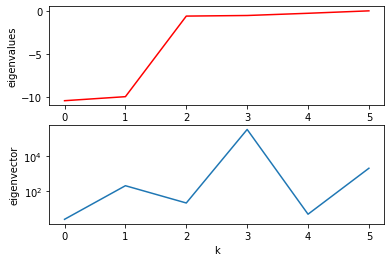

In [ ]:
points = [k for k in range(ev_inv.__len__())]
fig, axs = plt.subplots(2)
axs[0].set_xlabel("k")
axs[0].set_ylabel("eigenvalues")
axs[0].plot(points, [x - max_lambda for x in ew_inv],"r")

axs[1].set_yscale('log')
axs[1].set_xlabel("k")
axs[1].set_ylabel("eigenvector")
axs[1].plot(points, [error(x) for x in ev_inv])
#axs[1].plot(np.linspace(1,50,50), [error(x) for x in ev_iter],"r")



 Wenden Sie Ihren Code aus 2(a) für symmetrische Matrizen A mit verschiedenen
|λ2/λ1| an und plotten Sie log(ek) gegen k. Was beobachten Sie?

In [ ]:


def random_iteration(A,iterations = 0):
    dim = A.shape[0]
    index = np.argmax(np.abs(np.linalg.eig(A)[0]))
    
    v = np.linalg.eig(A)[1][:,index]
    error = lambda x : np.min([ np.linalg.norm(x - v,2),np.linalg.norm(x + v,2) ])
    
    xo = np.random.random_sample(dim)
    ev = []
    
    def power_method(A,x0 = xo,iterations = iterations):

    
        x = x0
        for k in range(iterations):
            # print(k," : ",x)
            x = A @ x
            ev.append(error(x))
        return normed(x)
    
    power_method(A)
    points = [k for k in range(ev.__len__())]
    fig, axs = plt.subplots(1)

    # axs.set_yscale('log')
    axs.set_xlabel("k")
    axs.plot(points, [np.log(error(x)) for x in ev])
    axs.legend("e")
    return

dimension  4
dimension  5
dimension  6


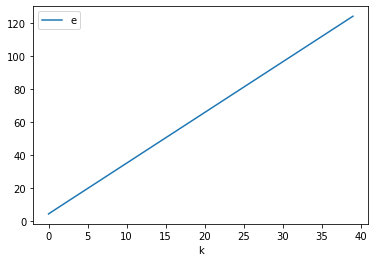

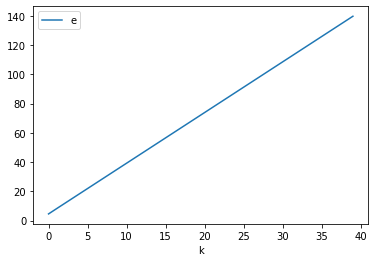

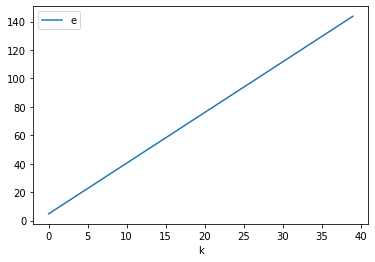

In [ ]:
for k in range(4,7):
    print("dimension ",k)
    A = np.random.random_sample((k,k)) * 10
    A = np.maximum( A, A.transpose() )
    random_iteration(A,40)


0.9085808367006359

3b)
(b) Für ein geeignetes k-Intervall, bestimmen Sie nun µ numerisch durch einen Kleinste
Quadrate Fit zu (1) und vergleichen Sie den Wert mit |λ2/λ1|.



In [ ]:


def random_iteration_silent(A,iterations = 0):
    dim = A.shape[0]
    index = np.argmax(np.abs(np.linalg.eig(A)[0]))
    
    v = np.linalg.eig(A)[1][:,index]
    error = lambda x : np.min([ np.linalg.norm(x - v,2),np.linalg.norm(x + v,2) ])
    
    xo = np.random.random_sample(dim)
    ev = []
    
    def power_method(A,x0 = xo,iterations = iterations):

    
        x = x0
        for k in range(iterations):
            # print(k," : ",x)
            x = A @ x
            ev.append(error(normed(x)))
        return normed(x)
    
    power_method(A)

    return ev[-1]

In [ ]:

A = np.random.random_sample((5,5)) ** 10
A = np.maximum( A, A.transpose() )

In [ ]:
e_40 = random_iteration_silent(A,40)

In [ ]:
e_40

3.650317651107842

In [ ]:
from sympy import *
c = Symbol("c")

In [ ]:
y = (log(e_40) - log(c))/40

In [ ]:
y

0.0323703547877122 - log(c)/40

In [ ]:
E**y # = mu

1.03289997392678/c**(1/40)

In [ ]:
np.abs(np.linalg.eig(A)[0])

array([1.04020457, 0.87588819, 0.18418187, 0.26882039, 0.32843657])

In [ ]:
np.abs(np.linalg.eig(A)[0])[1] / np.abs(np.linalg.eig(A)[0])[0] # = | λ2/λ1 |

0.8420345574683088